### sales analysis 

# # Import your backages 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_1=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_January_2019.csv")
data_2=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_February_2019.csv")
data_3=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_March_2019.csv")
data_4=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_April_2019.csv")
data_5=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_May_2019.csv")

data_6=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_June_2019.csv")
data_7=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_July_2019.csv")
data_8=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_August_2019.csv")
data_9=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_September_2019.csv")

data_10=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_October_2019.csv")
data_11=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_November_2019.csv")
data_12=pd.read_csv(r"D:\GitHup\SalesAnalysis Pyp\Sales_Data\Sales_December_2019.csv")

In [4]:
all_sales=pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12]).reset_index()

In [5]:
all_sales.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
all_sales['month']=all_sales['Order Date'].str[0:2]

In [7]:
all_sales.isnull().sum()

index                 0
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month               545
dtype: int64

In [8]:
all_sales.tail()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
186847,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12
186849,25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",12


In [9]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             186850 non-null  int64 
 1   Order ID          186305 non-null  object
 2   Product           186305 non-null  object
 3   Quantity Ordered  186305 non-null  object
 4   Price Each        186305 non-null  object
 5   Order Date        186305 non-null  object
 6   Purchase Address  186305 non-null  object
 7   month             186305 non-null  object
dtypes: int64(1), object(7)
memory usage: 11.4+ MB


###### convert data type as well [month  Order Date  Price  Each  Order ID]

##### THER IS STR ERROR IN OUR DATA 

In [10]:
all_sales['month']=all_sales['month'].replace('Or',np.nan)
all_sales['Purchase Address']=all_sales['Purchase Address'].replace('Purchase Address',np.nan)
all_sales['Order Date']=all_sales['Order Date'].replace('Order Date',np.nan)
all_sales['Price Each']=all_sales['Price Each'].replace('Price Each',np.nan)
all_sales['Quantity Ordered']=all_sales['Quantity Ordered'].replace('Quantity Ordered',np.nan)
all_sales['Product']=all_sales['Product'].replace('Product',np.nan)
all_sales['Order ID']=all_sales['Order ID'].replace('Order ID',np.nan)


### now our data is clean from str error we replaced it with nan so let's replace nan with values

In [11]:
all_sales.dropna(inplace =True)

In [12]:
all_sales.isnull().sum()

index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
month               0
dtype: int64

#### now let's fix data type 

In [13]:
all_sales['Quantity Ordered']=all_sales['Quantity Ordered'].astype('int32')
all_sales['Price Each']=all_sales['Price Each'].astype('float')
all_sales['Order ID']=all_sales['Order ID'].astype('int32')
all_sales['month']=all_sales['month'].astype('int32')
all_sales['Order Date']=pd.to_datetime(all_sales['Order Date'])


In [14]:
all_sales['Revenue']=all_sales['Quantity Ordered']*all_sales['Price Each']
all_sales

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


## Now data is cleaned from text error and nan and datatype error you can process data easy

#### let's create z-score

In [15]:
mean=all_sales['Revenue'].mean()
std=all_sales['Revenue'].std()
all_sales['Rev_Z-score']=all_sales['Revenue']-mean/std

In [16]:
all_sales

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,Rev_Z-score
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,699.442836
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.392836
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,23.422836
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,149.432836
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,11.432836
...,...,...,...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,14.392836
186846,25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,7.122836
186847,25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,399.442836
186848,25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,11.432836


## there is correlation or not 

In [17]:
all_sales.corr()

,index,Order ID,Quantity Ordered,Price Each,month,Revenue,Rev_Z-score
index,1.000000,0.357507,-0.003133,0.001471,0.266516,0.001373,0.001373
Order ID,0.357507,1.000000,0.000702,-0.002857,0.993063,-0.002949,-0.002949
Quantity Ordered,-0.003133,0.000702,1.000000,-0.148272,0.000791,-0.139417,-0.139417
Price Each,0.001471,-0.002857,-0.148272,1.000000,-0.003375,0.999203,0.999203
month,0.266516,0.993063,0.000791,-0.003375,1.000000,-0.003466,-0.003466
Revenue,0.001373,-0.002949,-0.139417,0.999203,-0.003466,1.000000,1.000000
Rev_Z-score,0.001373,-0.002949,-0.139417,0.999203,-0.003466,1.000000,1.000000


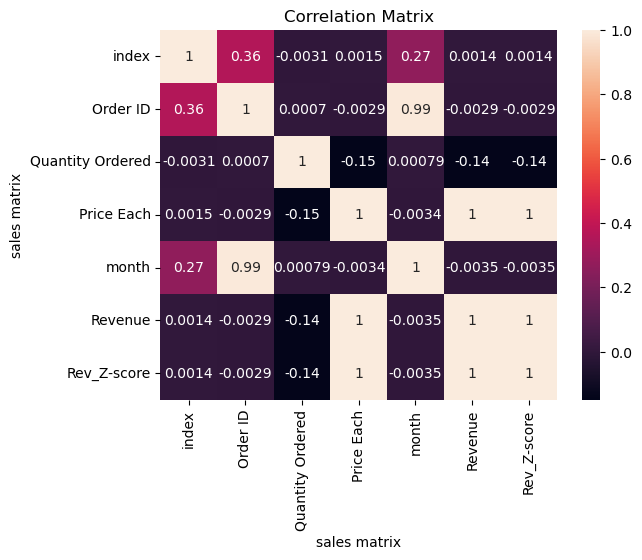

In [20]:
sns.heatmap(all_sales.corr(),annot=True)
plt.title('Correlation Matrix')
plt.xlabel('sales matrix')
plt.ylabel('sales matrix')
plt.show()

### What was the best month for sales? How much was earned that month?

In [21]:
results=all_sales.groupby('month').sum()['Revenue']
results

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Revenue, dtype: float64

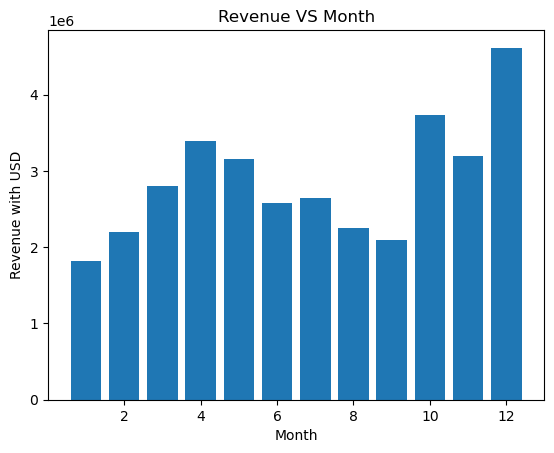

In [22]:
months=range(1,13)
plt.bar(months, results)
plt.title('Revenue VS Month')
plt.ylabel('Revenue with USD')
plt.xlabel('Month')
plt.show()

####  what is city with high level of sales

#### let's create a city column 

In [23]:
all_sales['city']=all_sales['Purchase Address'].apply(lambda x: x.split(',')[1])
all_sales['city']

0                 Boston
1               Portland
2          San Francisco
3            Los Angeles
4                 Austin
               ...      
186845     San Francisco
186846       Los Angeles
186847           Seattle
186848            Dallas
186849       Los Angeles
Name: city, Length: 185950, dtype: object

In [24]:
city_sales=all_sales.groupby('city').sum()['Revenue']
city_sales

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='city'>

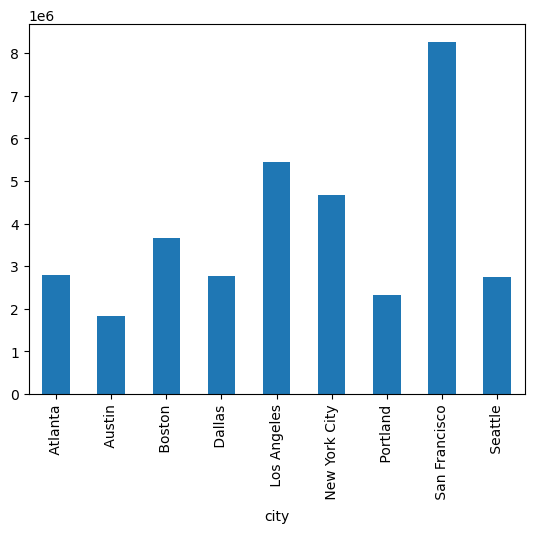

In [25]:
city_sales.plot( kind='bar')

## what is the best time to do adds 

##### task 4 create col for min & hrs

In [26]:
all_sales['hours']=all_sales['Order Date'].dt.hour
all_sales['minutes']=all_sales['Order Date'].dt.minute
all_sales.head(2)


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,Rev_Z-score,city,hours,minutes
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,699.442836,Boston,21,25
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,14.392836,Portland,14,15


<AxesSubplot:xlabel='hours'>

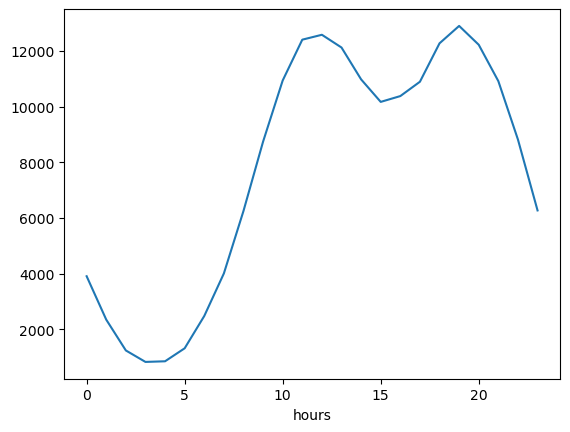

In [27]:
best_hour=all_sales.groupby('hours').count()['Quantity Ordered']
best_hour.plot(kind= 'line')

<AxesSubplot:xlabel='minutes'>

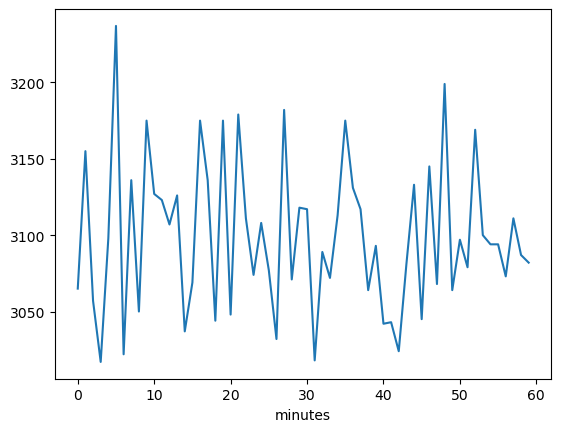

In [28]:
best_min=all_sales.groupby('minutes').count()['Quantity Ordered']
best_min.plot(kind= 'line')


### what is the most product was sold together 

In [35]:
df=all_sales[all_sales['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df[['Order ID','grouped']].drop_duplicates()
df.head(30)

C:\Users\mario\AppData\Local\Temp\ipykernel_10800\3746276484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Revenue,Rev_Z-score,city,hours,minutes,grouped
41,41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,11.392836,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
42,42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,11.432836,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
57,57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,149.442836,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,10.962836,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,399.442836,New York City,11,19,"Vareebadd Phone,Wired Headphones"
134,134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,11.99,11.432836,New York City,11,19,"Vareebadd Phone,Wired Headphones"
153,153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,599.442836,Boston,0,14,"Google Phone,USB-C Charging Cable"
154,154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,11.95,11.392836,Boston,0,14,"Google Phone,USB-C Charging Cable"
220,220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,599.442836,San Francisco,11,16,"Google Phone,Bose SoundSport Headphones"
221,221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,99.99,99.432836,San Francisco,11,16,"Google Phone,Bose SoundSport Headphones"


In [37]:
df['grouped'].value_counts().head()

iPhone,Lightning Charging Cable         1764
Google Phone,USB-C Charging Cable       1712
iPhone,Wired Headphones                  722
Vareebadd Phone,USB-C Charging Cable     624
Google Phone,Wired Headphones            606
Name: grouped, dtype: int64